In [1]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "32604"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
icesat = Altimetry(directory=directory, dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [ ]:
icesat.pull_atl06sr_multi_processing(
    save_to_parquet=True,
)

# icesat.pull_atl06sr_multi_processing(
#     res=10,
#     len=20,
#     ats=20,
#     cnt=5,
#     maxi=5,
#     save_to_parquet=True,
# )


ICESat-2 ATL06 request processing for: high_confidence
atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence.parquet
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence.parquet
Filtering ATL06-SR high_confidence
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_high_confidence_filtered.parquet

ICESat-2 ATL06 request processing for: ground
atl06sr_res20_len40_cnt10_ats20_maxi5_ground.parquet
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground.parquet
Filtering ATL06-SR ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground_filtered.parquet

ICESat-2 ATL06 request processing for: canopy
atl06sr_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Filtering ATL06-SR canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy_filtered.parquet

ICESat-2 ATL06 request processing

In [5]:
icesat.atl06sr_processing_levels["high_confidence"].shape

(142959, 20)

In [6]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(120226, 20)

In [7]:
# Filter by ESA WorldCover
icesat.filter_esa_worldcover()

In [8]:
icesat.atl06sr_processing_levels_filtered["high_confidence"].shape

(34372, 20)

In [9]:
# User defined temporal filter
# icesat.generic_temporal_filter_atl06sr(
#     select_years=[2021, 2022, 2023],
#     select_months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     select_days=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
# )

In [10]:
# Predefined temporal filter
icesat.predefined_temporal_filter_atl06sr()


Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: high_confidence

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: ground

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: canopy

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: top_of_canopy


In [11]:
icesat.atl06sr_processing_levels_filtered["ground_seasonal"].shape

(12092, 20)

In [12]:
# Write out filtered data to CSVs that can be ingested by pc_align
icesat.to_csv_for_pc_align()

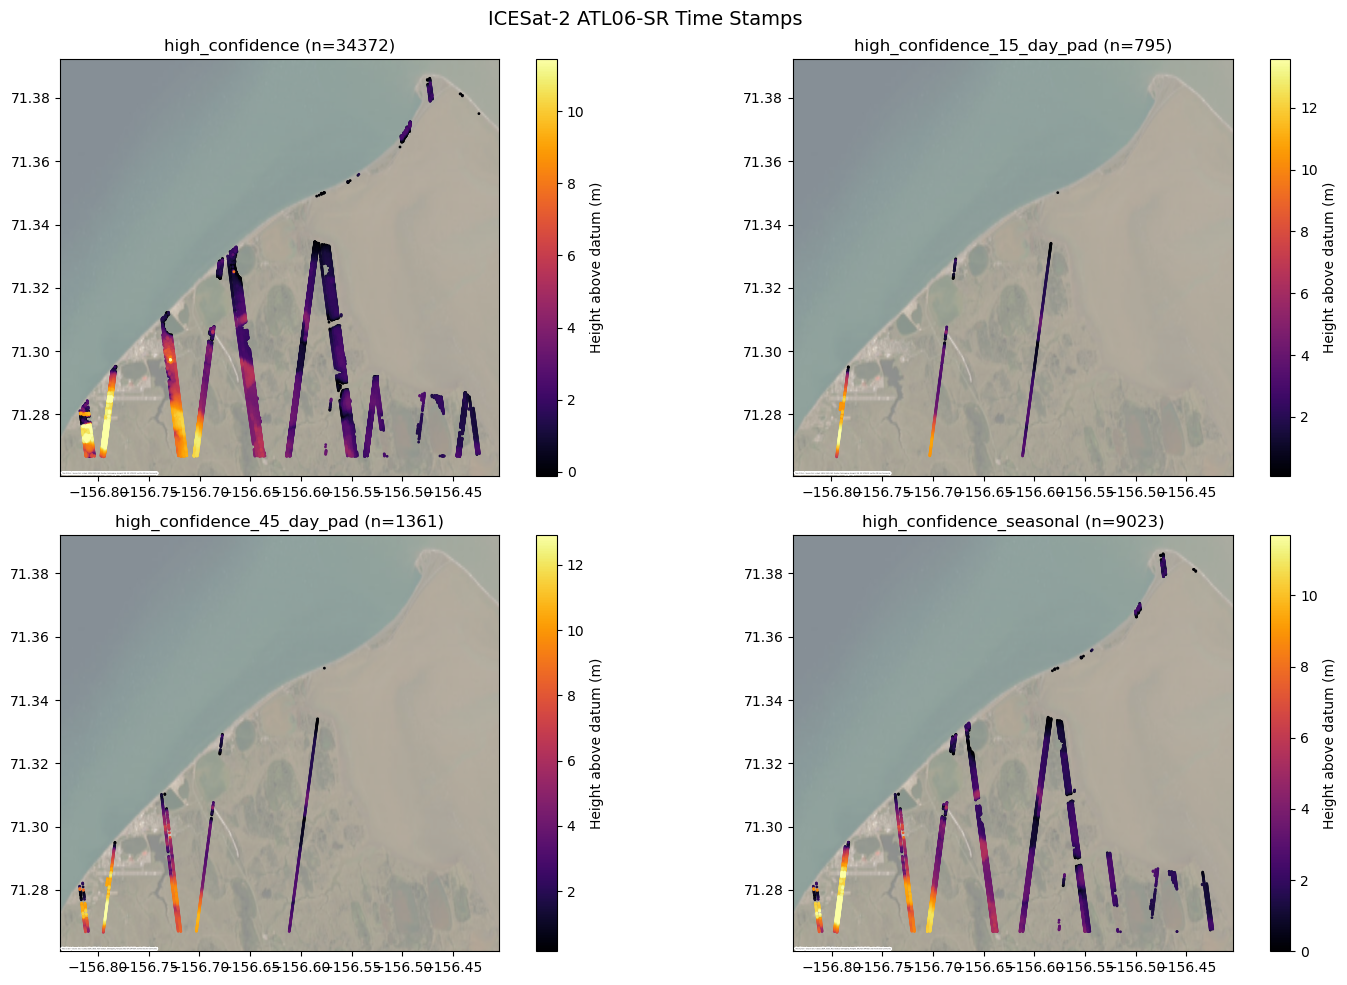

In [13]:
icesat.plot_atl06sr_time_stamps(
   key="high_confidence",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

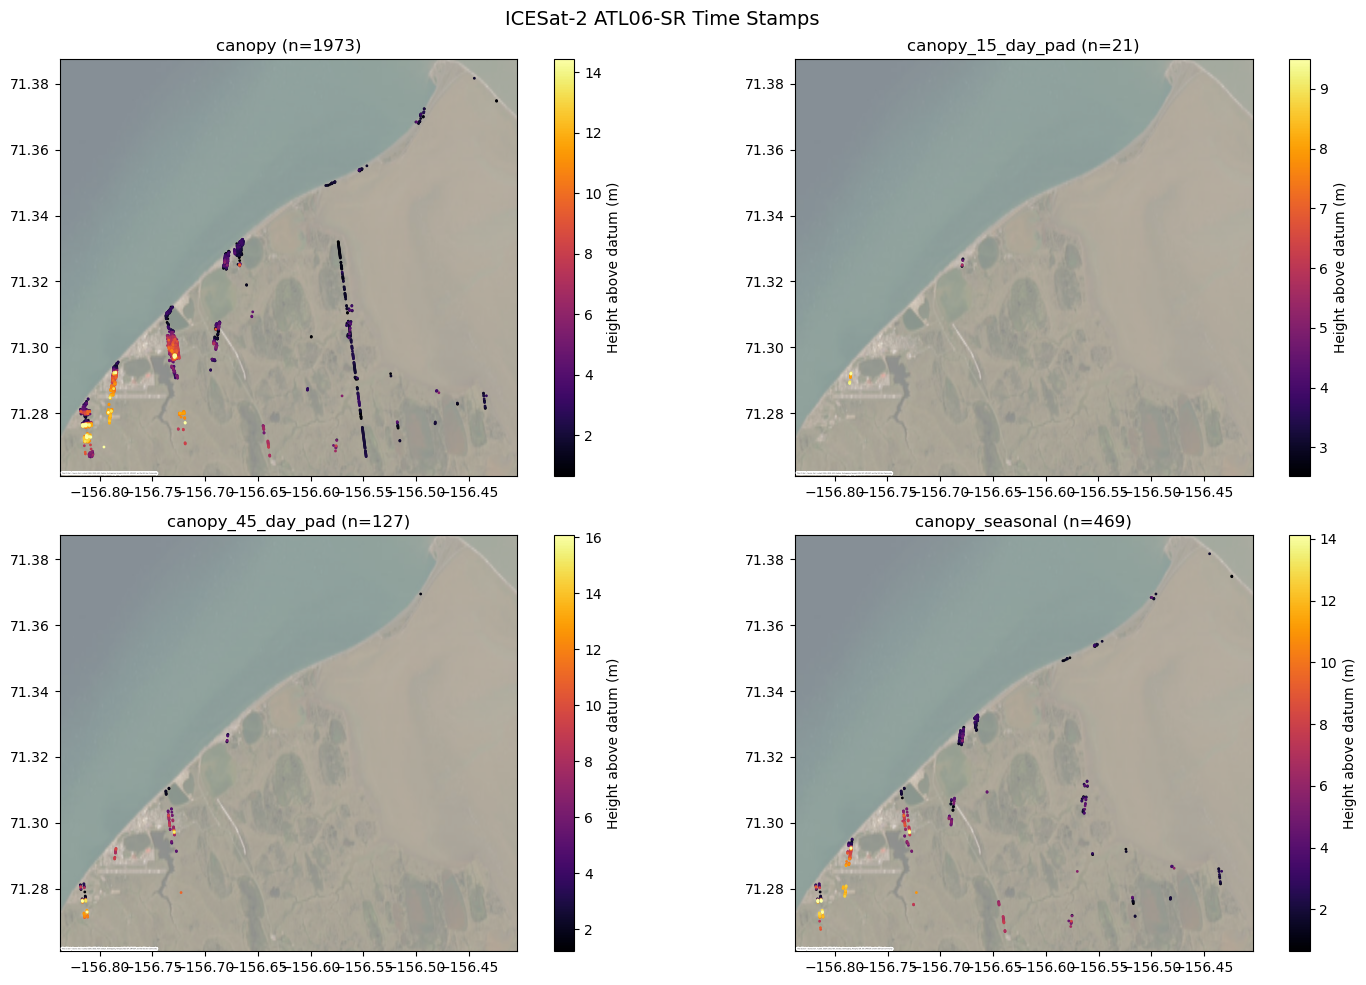

In [14]:
icesat.plot_atl06sr_time_stamps(
   key="canopy",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

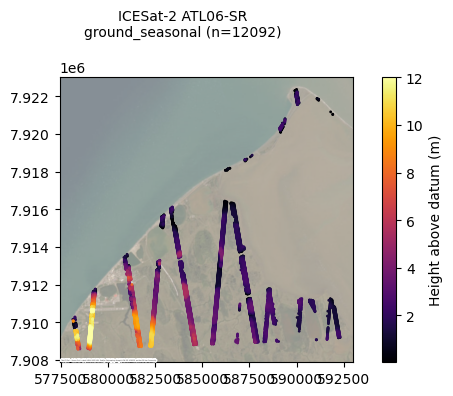

In [15]:
icesat.plot_atl06sr(
    key="ground_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

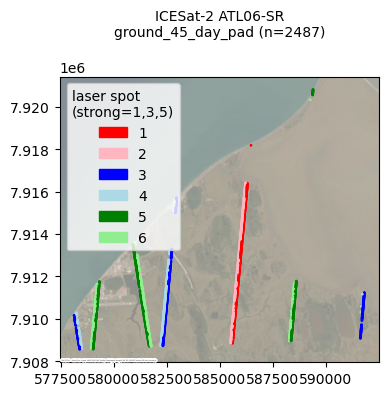

In [16]:
icesat.plot_atl06sr(
    key="ground_45_day_pad",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    plot_beams=True,
    **ctx_kwargs
)

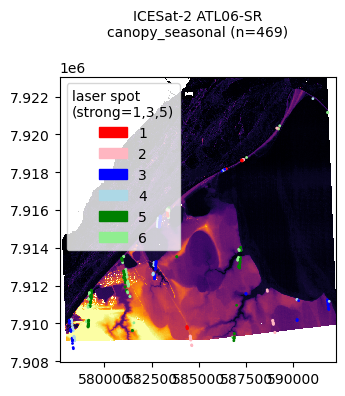

In [17]:
icesat.plot_atl06sr(
    key="canopy_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=True,
    plot_beams=True,
    **ctx_kwargs
)

In [19]:
icesat.atl06sr_to_dem_dh()

In [20]:
icesat.atl06sr_processing_levels_filtered["ground_15_day_pad"][["icesat_minus_dem", "icesat_minus_aligned_dem"]].describe()

,icesat_minus_dem,icesat_minus_aligned_dem
count,1424.000000,1423.000000
mean,0.714710,-0.069167
std,0.517729,0.516826
min,-8.279421,-9.033586
25%,0.677098,-0.105930
50%,0.767425,-0.015643
75%,0.863918,0.079351
max,1.602890,0.787521


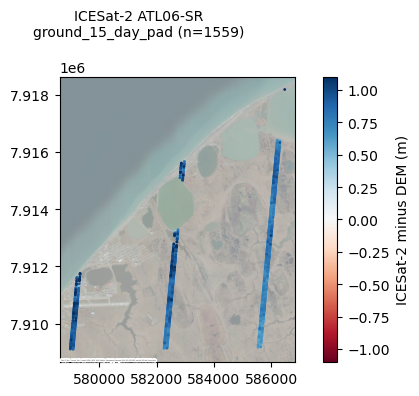

In [21]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    **ctx_kwargs,
)

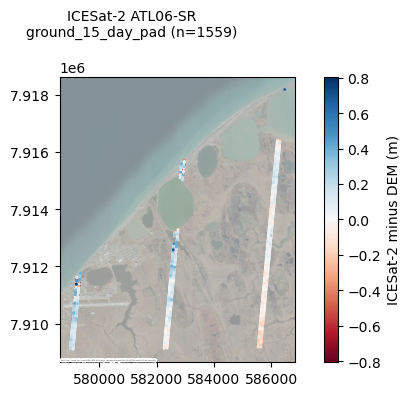

In [22]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)

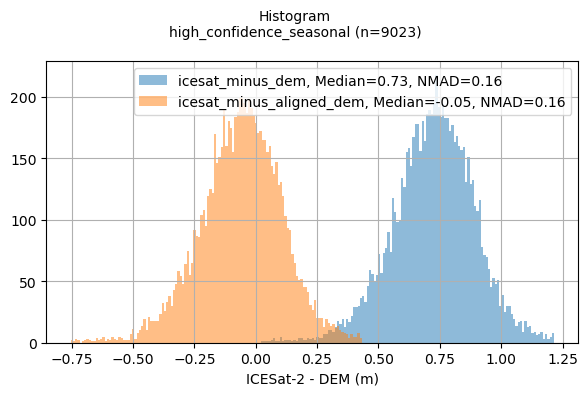

In [23]:
# Show a quick histogram
icesat.histogram(
    key="high_confidence_seasonal",
    plot_aligned=True,
)

In [3]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_defaults_all"),
        parms=None,
    )

icesat.atl06sr

,y_atc,x_atc,segment_id,w_surface_window_final,gt,rms_misfit,spot,n_fit_photons,pflags,h_mean,rgt,dh_fit_dx,region,h_sigma,cycle,geometry,esa_worldcover.flags,esa_worldcover.file_id,esa_worldcover.value,esa_worldcover.time
time,,,,,,,,,,,,,,,,,,,,
2018-11-20 23:50:33.459589376,-4467.259766,7950044.5,396648,3.000000e+00,60,0.134788,1,10,0,8.783496,815,0.002570,3,0.064915,1,POINT (-156.68342 71.2681),0,120259084288,90.0,1.309046e+12
2018-11-20 23:50:33.527074048,-1218.220337,7950425.0,396667,3.000000e+00,40,0.093223,3,15,0,12.821935,815,0.003775,3,0.027440,1,POINT (-156.77463 71.26773),0,120259084288,30.0,1.309046e+12
2018-11-20 23:50:33.530016768,-1218.214722,7950445.0,396668,3.000000e+00,40,0.099579,3,13,0,12.912689,815,0.004168,3,0.039577,1,POINT (-156.77471 71.26792),0,120259084288,30.0,1.309046e+12
2018-11-20 23:50:33.532833792,-1218.210327,7950465.0,396669,3.000000e+00,40,0.146518,3,11,0,13.087043,815,0.007202,3,0.045450,1,POINT (-156.77478 71.26809),0,120259084288,30.0,1.309046e+12
2018-11-20 23:50:33.535680000,-1218.213501,7950485.0,396670,3.000000e+00,40,0.131781,3,15,0,13.246701,815,0.002723,3,0.034577,1,POINT (-156.77485 71.26827),0,120259084288,30.0,1.309046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:10.995255296,3226.183594,12120135.0,605068,3.376774e+37,20,0.264175,5,14,0,3.464851,381,-0.001165,5,0.078120,23,POINT (-156.61288 71.26838),0,60129542144,90.0,1.309046e+12
2024-04-12 14:33:10.998089984,3226.091064,12120155.0,605069,3.376774e+37,20,0.242453,5,20,0,3.431344,381,-0.003981,5,0.055120,23,POINT (-156.61295 71.2682),0,60129542144,90.0,1.309046e+12
2024-04-12 14:33:11.000924160,3225.997803,12120175.0,605070,2.532580e+37,20,0.223190,5,17,0,3.488348,381,0.008699,5,0.055067,23,POINT (-156.61303 71.26803),0,60129542144,90.0,1.309046e+12


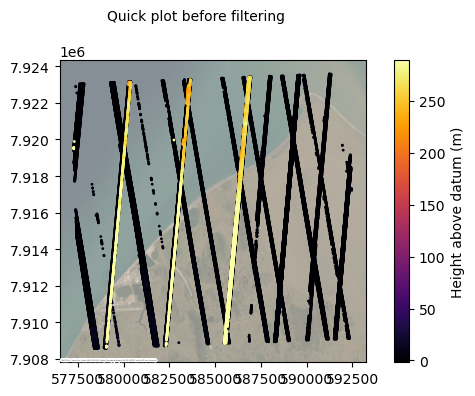

In [5]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

In [6]:
# Filter data down
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_defaults_filtered"),
    )

icesat.atl06sr_filtered

,n_fit_photons,spot,y_atc,x_atc,rgt,gt,h_mean,dh_fit_dx,cycle,h_sigma,pflags,region,rms_misfit,w_surface_window_final,segment_id,geometry,esa_worldcover.time,esa_worldcover.flags,esa_worldcover.value,esa_worldcover.file_id
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210849792,93,1,3311.713135,12110909.0,381,10,-0.341876,-0.020158,15,0.054879,0,5,0.183663,3.0,604607,POINT (-156.57677 71.35026),1.309046e+12,0,60.0,309237645312
2022-04-17 01:15:56.213662464,233,1,3311.738525,12110929.0,381,10,-0.466327,0.021334,15,0.014196,0,5,0.201344,3.0,604608,POINT (-156.57684 71.35008),1.309046e+12,0,50.0,309237645312
2022-04-17 01:15:56.467528960,397,1,3309.855713,12112730.0,381,10,-0.324278,0.009540,15,0.007755,0,5,0.154314,3.0,604698,POINT (-156.5835 71.33408),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.470364928,370,1,3309.832031,12112750.0,381,10,-0.193495,0.005028,15,0.007654,0,5,0.147074,3.0,604699,POINT (-156.58357 71.3339),1.309046e+12,0,90.0,309237645312
2022-04-17 01:15:56.473200128,368,1,3309.790283,12112770.0,381,10,-0.114474,0.003891,15,0.006003,0,5,0.115157,3.0,604700,POINT (-156.58365 71.33372),1.309046e+12,0,90.0,309237645312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.719849728,72,6,-3313.918701,12119394.0,381,60,10.424692,-0.006849,15,0.018753,0,5,0.153063,3.0,605031,POINT (-156.79114 71.28253),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.722661120,85,6,-3313.976074,12119414.0,381,60,10.358472,0.000286,15,0.015511,0,5,0.142104,3.0,605032,POINT (-156.79121 71.28235),1.309046e+12,0,100.0,309237645312
2022-04-17 01:15:57.725475328,82,6,-3314.024170,12119434.0,381,60,10.315920,-0.002977,15,0.013112,0,5,0.117638,3.0,605033,POINT (-156.79129 71.28218),1.309046e+12,0,90.0,309237645312


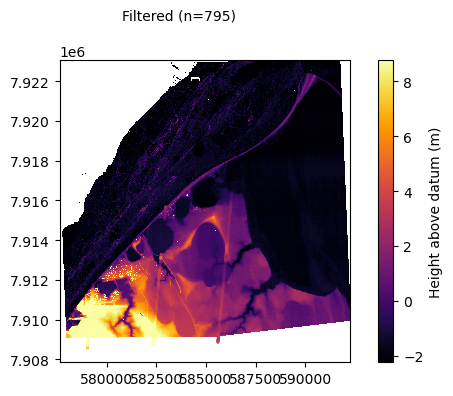

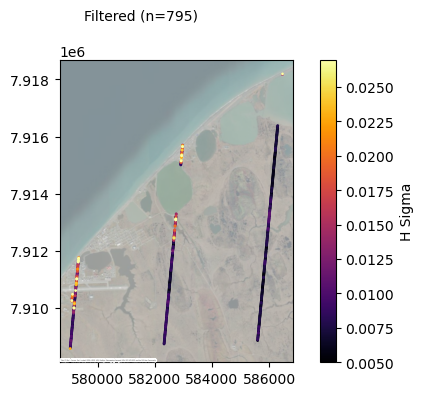

In [7]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    plot_dem=True,
    **ctx_kwargs
)

icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

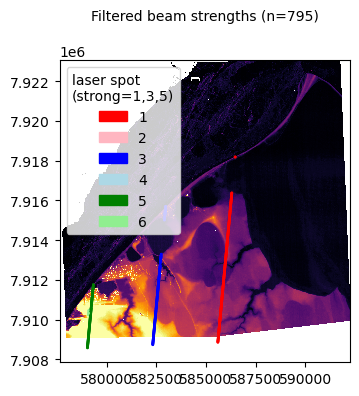

In [8]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=True,
    map_crs=map_crs,
    **ctx_kwargs
)

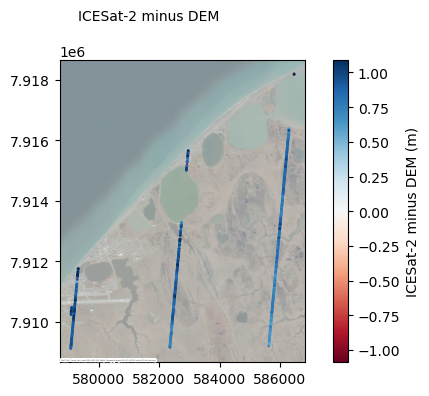

In [9]:
icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [10]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_defaults_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

Aligned DEM was already supplied: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated.tif

Please use that, or remove this file before running pc_align.



In [11]:
# Report
report = icesat.pc_align_report(
    pc_align_folder=os.path.join(directory, "pc_align")
)
print(report)

Input: error percentile of smallest errors (meters): 16%: 0.633969, 50%: 0.790307, 84%: 0.918597
Input: mean of smallest errors (meters): 25%: 0.577857, 50%: 0.65753, 75%: 0.715642, 100%: 0.855328
Output: error percentile of smallest errors (meters): 16%: 0.0302904, 50%: 0.0944924, 84%: 0.208051
Output: mean of smallest errors (meters): 25%: 0.0229895, 50%: 0.0470284, 75%: 0.0736527, 100%: 0.23137
Translation vector (Cartesian, meters): Vector3(0.4888486,-0.011891315,-0.67711856)
Translation vector magnitude (meters): 0.83522685



In [12]:
# SLOW: uses point2dem
# icesat.generate_translated_dem(
#     pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
#     dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
# )

icesat.apply_dem_translation(
    pc_align_folder=os.path.join(directory, "pc_align"),
)


Aligned DEM already exists: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated.tif

Please use that, or remove this file before running pc_align.



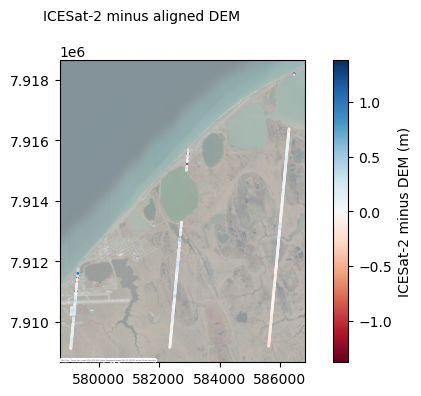

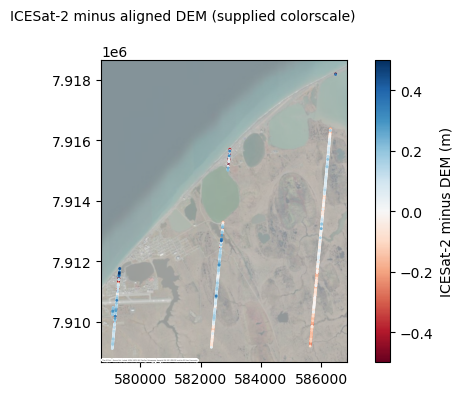

In [13]:
# Quickly compare the translated DEM to the ATL06 data
icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus aligned DEM",
    plot_aligned=True, 
    **ctx_kwargs
)

icesat.mapview_plot_atl06sr_to_dem(
    title="ICESat-2 minus aligned DEM (supplied colorscale)",
    clim=(-0.5, 0.5),
    plot_aligned=True,
    **ctx_kwargs
)

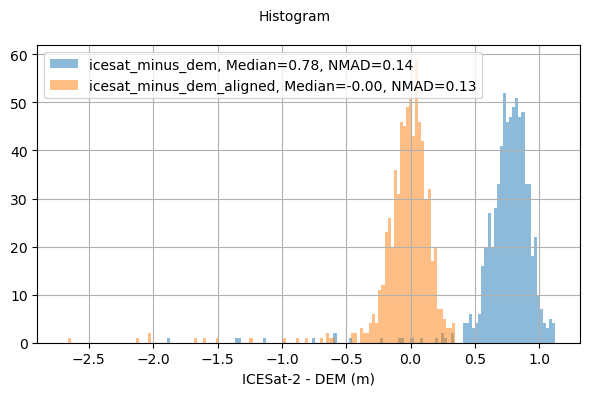

In [14]:
# Show a quick histogram
icesat.histogram(plot_aligned=True)

In [15]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_parquet=False,
    filename=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

,y_atc,x_atc,segment_id,w_surface_window_final,gt,rms_misfit,spot,n_fit_photons,pflags,h_mean,rgt,dh_fit_dx,region,h_sigma,cycle,geometry,esa_worldcover.flags,esa_worldcover.file_id,esa_worldcover.value,esa_worldcover.time
time,,,,,,,,,,,,,,,,,,,,
2019-04-19 05:26:30.503366144,-19917.314453,12108628.0,604492,3.000000e+00,30,0.223283,3,24,0,-1.091037,320,-0.013024,5,0.045578,3,POINT (-156.4365 71.39673),0,193273528320,80.0,1.309046e+12
2019-04-19 05:26:30.506182656,-19917.373047,12108648.0,604493,3.000000e+00,30,0.209903,3,28,0,-1.150732,320,0.002815,5,0.039729,3,POINT (-156.43657 71.39655),0,193273528320,80.0,1.309046e+12
2019-04-19 05:26:30.509004288,-19917.423828,12108668.0,604494,3.000000e+00,30,0.216712,3,22,0,-1.142687,320,-0.007234,5,0.055254,3,POINT (-156.43664 71.39637),0,193273528320,80.0,1.309046e+12
2019-04-19 05:26:30.540205568,-23169.822266,12109008.0,604511,3.000000e+00,50,0.324610,5,77,0,-1.147487,320,-0.010355,5,0.038526,3,POINT (-156.52843 71.39684),0,193273528320,80.0,1.309046e+12
2019-04-19 05:26:30.543028224,-23169.826172,12109028.0,604512,3.000000e+00,50,0.320169,5,98,0,-1.355606,320,-0.009442,5,0.032394,3,POINT (-156.5285 71.39666),0,193273528320,80.0,1.309046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:10.992423424,3226.265869,12120115.0,605067,4.502365e+37,20,0.133545,5,11,0,3.452427,381,0.005191,5,0.041516,23,POINT (-156.6128 71.26856),0,60129542144,90.0,1.309046e+12
2024-04-12 14:33:10.995255296,3226.183594,12120135.0,605068,3.376774e+37,20,0.264175,5,14,0,3.464851,381,-0.001165,5,0.078120,23,POINT (-156.61288 71.26838),0,60129542144,90.0,1.309046e+12
2024-04-12 14:33:10.998089984,3226.091064,12120155.0,605069,3.376774e+37,20,0.242453,5,20,0,3.431344,381,-0.003981,5,0.055120,23,POINT (-156.61295 71.2682),0,60129542144,90.0,1.309046e+12


In [16]:
# recalculate dh with newly filtered points
icesat.atl06sr_to_dem_dh()

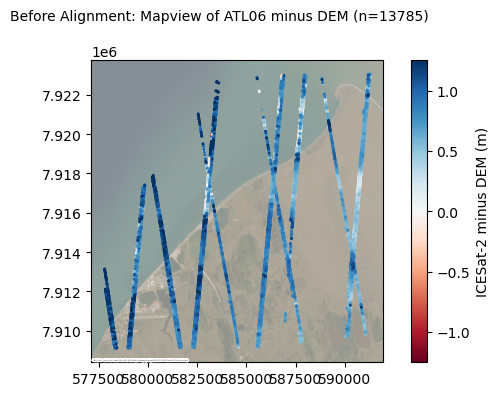

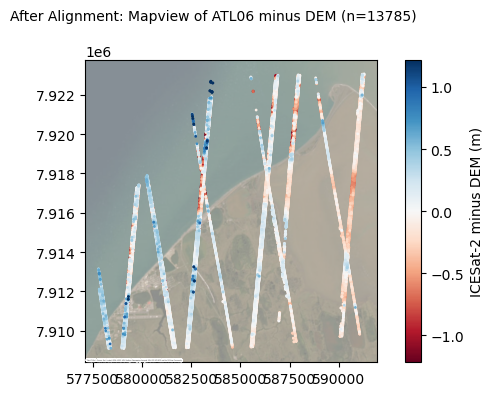

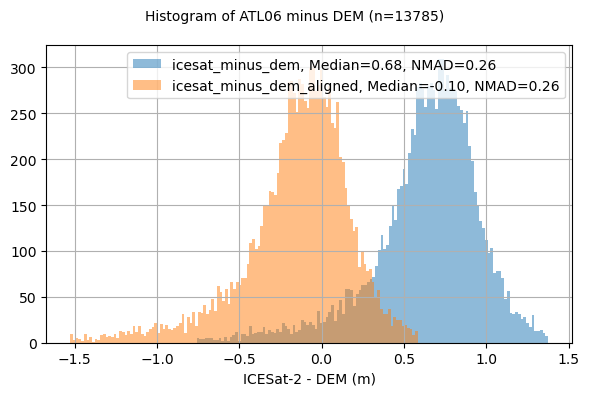

In [17]:
# Validate (before and after)
icesat.mapview_plot_atl06sr_to_dem(
    title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=False, 
    **ctx_kwargs
)

icesat.mapview_plot_atl06sr_to_dem(
    title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=True, 
    **ctx_kwargs
)

icesat.histogram(
    title=f"Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})",
    plot_aligned=True
)

In [18]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    save_to_csv=False,
    select_months=[4],
    select_years=[2022],
)

,y_atc,x_atc,segment_id,w_surface_window_final,gt,rms_misfit,spot,n_fit_photons,pflags,h_mean,rgt,dh_fit_dx,region,h_sigma,cycle,geometry,esa_worldcover.flags,esa_worldcover.file_id,esa_worldcover.value,esa_worldcover.time
time,,,,,,,,,,,,,,,,,,,,
2022-04-17 01:15:56.210849792,3311.713135,12110909.0,604607,3.0,10,0.183663,1,93,0,-0.341876,381,-0.020158,5,0.054879,15,POINT (-156.57677 71.35026),0,146028888064,60.0,1.309046e+12
2022-04-17 01:15:56.213662464,3311.738525,12110929.0,604608,3.0,10,0.201344,1,233,0,-0.466327,381,0.021334,5,0.014196,15,POINT (-156.57684 71.35008),0,146028888064,50.0,1.309046e+12
2022-04-17 01:15:56.467528960,3309.855713,12112730.0,604698,3.0,10,0.154314,1,397,0,-0.324278,381,0.009540,5,0.007755,15,POINT (-156.5835 71.33408),0,146028888064,90.0,1.309046e+12
2022-04-17 01:15:56.470364928,3309.832031,12112750.0,604699,3.0,10,0.147074,1,370,0,-0.193495,381,0.005028,5,0.007654,15,POINT (-156.58357 71.3339),0,146028888064,90.0,1.309046e+12
2022-04-17 01:15:56.473200128,3309.790283,12112770.0,604700,3.0,10,0.115157,1,368,0,-0.114474,381,0.003891,5,0.006003,15,POINT (-156.58365 71.33372),0,146028888064,90.0,1.309046e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17 01:15:57.719849728,-3313.918701,12119394.0,605031,3.0,60,0.153063,6,72,0,10.424692,381,-0.006849,5,0.018753,15,POINT (-156.79114 71.28253),0,146028888064,100.0,1.309046e+12
2022-04-17 01:15:57.722661120,-3313.976074,12119414.0,605032,3.0,60,0.142104,6,85,0,10.358472,381,0.000286,5,0.015511,15,POINT (-156.79121 71.28235),0,146028888064,100.0,1.309046e+12
2022-04-17 01:15:57.725475328,-3314.024170,12119434.0,605033,3.0,60,0.117638,6,82,0,10.315920,381,-0.002977,5,0.013112,15,POINT (-156.79129 71.28218),0,146028888064,90.0,1.309046e+12


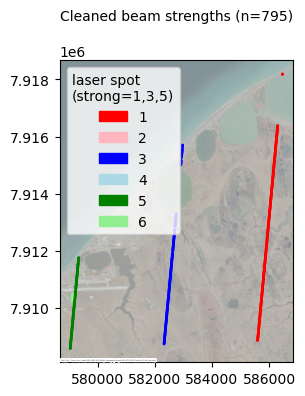

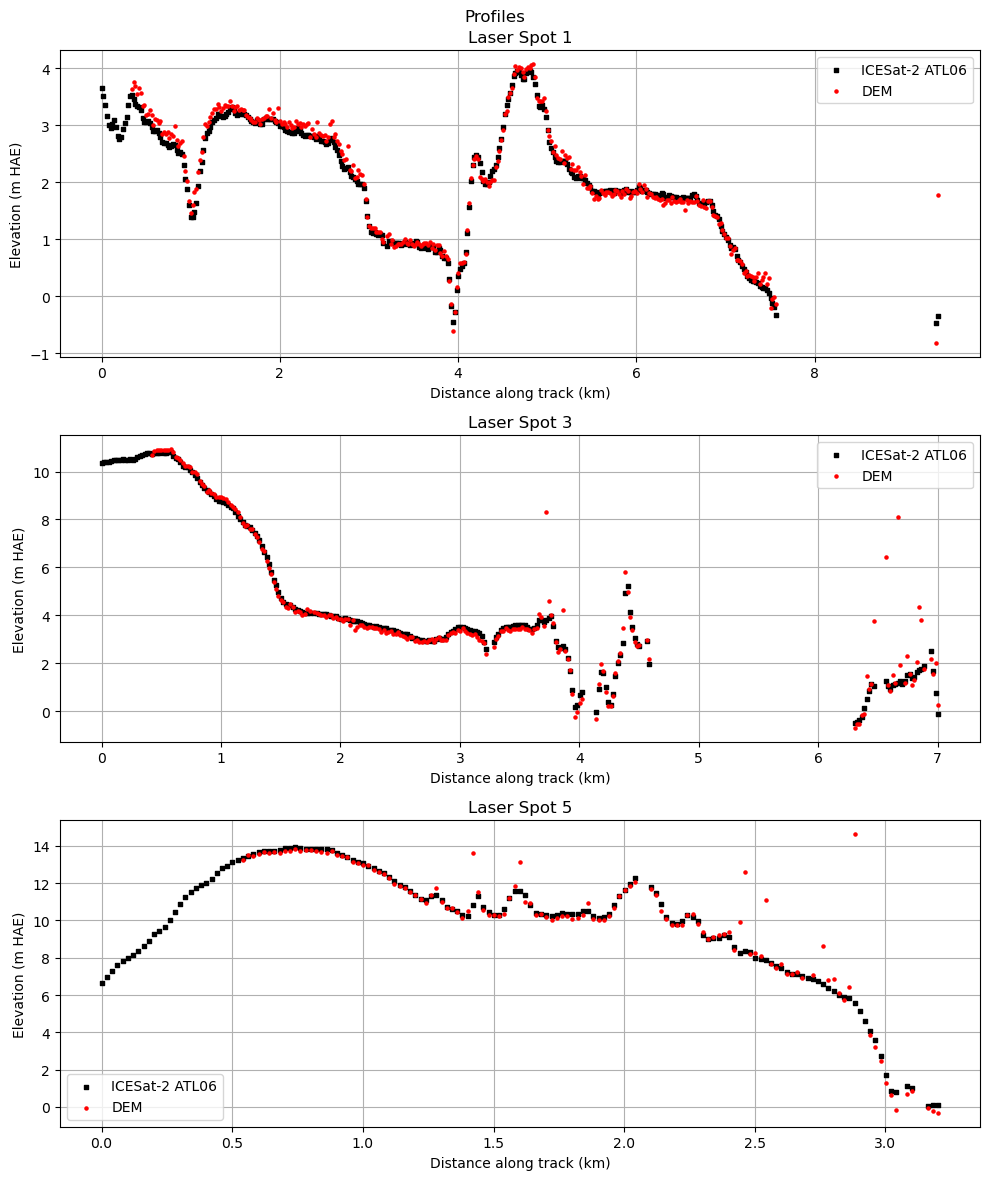

In [19]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)